# Linear Regression

In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Data Import
df = pd.read_csv(join('data','abalone.csv'))
df.head(5)

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
## Remove columns we do not use in this example
del df['sex']
del df['rings']
df.head(5)

,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [4]:
## Some functions to explore data
print(df.corr())
print(df.dtypes)
print(df.shape)

                 length  diameter    height  wholeweight  shuckedweight  \
length         1.000000  0.986812  0.827554     0.925261       0.897914   
diameter       0.986812  1.000000  0.833684     0.925452       0.893162   
height         0.827554  0.833684  1.000000     0.819221       0.774972   
wholeweight    0.925261  0.925452  0.819221     1.000000       0.969405   
shuckedweight  0.897914  0.893162  0.774972     0.969405       1.000000   
visceraweight  0.903018  0.899724  0.798319     0.966375       0.931961   
shellweight    0.897706  0.905330  0.817338     0.955355       0.882617   

               visceraweight  shellweight  
length              0.903018     0.897706  
diameter            0.899724     0.905330  
height              0.798319     0.817338  
wholeweight         0.966375     0.955355  
shuckedweight       0.931961     0.882617  
visceraweight       1.000000     0.907656  
shellweight         0.907656     1.000000  
length           float64
diameter         float

In [5]:
## Train-Valiedation Spli
## Index control by yourself
n_data = df.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,4177))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

4177 2924 1253
[2314  632 3471 ...  846 2516 1082]
2924 1253


In [6]:
trnx = df.iloc[idx_trn,0:6]
trny = df.iloc[idx_trn,6]
tstx = df.iloc[idx_tst,0:6]
tsty = df.iloc[idx_tst,6]

In [7]:
## Or you can use just this !!
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(df.iloc[:,0:6], df.iloc[:,6], test_size=0.3, random_state=123)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
ab_pred = model.predict(X=tstx)
print(ab_pred)

[0.00781831 0.33229374 0.11536906 ... 0.14878482 0.15407296 0.04044321]


In [9]:
## Calculation of RMSE
np.sqrt(np.mean((np.square(ab_pred - tsty))))

0.028717866737623

[93.15364823]


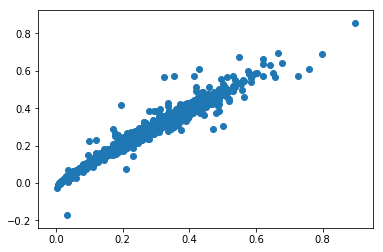

In [10]:
plt.scatter(x=tsty, y=ab_pred)
print(np.correlate(tsty, ab_pred))

In [11]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(ab_pred, tsty)))
print('R2:', metrics.r2_score(tsty, ab_pred))

RMSE: 0.028717866737623013
R2: 0.9584510910168629


In [12]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
ab_pred_lasso = model_lasso.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ab_pred_lasso, tsty)))

from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
ab_pred_ridge = model_ridge.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ab_pred_ridge, tsty)))

print(model.coef_, model_lasso.coef_, model_ridge.coef_)

RMSE: 0.14102268356979053
RMSE: 0.029454831508413708
[-0.05217783  0.22752262  0.12127479  0.50970163 -0.45116463 -0.36823772] [0. 0. 0. 0. 0. 0.] [ 0.02531582  0.13482249  0.10007428  0.45013911 -0.38538878 -0.22413947]


In [13]:
from sklearn.feature_selection import RFE
selector = RFE(model)
selector = selector.fit(X=trnx, y=trny)
print(selector.support_ )
print(selector.ranking_)

[False False False  True  True  True]
[4 2 3 1 1 1]
